In [1]:
# import packages that we need
import pandas as pd
import numpy as np
import keras
import os
import zipfile
import random
import shutil
import tensorflow as tf
import pathlib
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt

from tensorflow.keras.optimizers import RMSprop
from sklearn.utils.class_weight import compute_class_weight

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras.models import load_model
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

import tensorflow_datasets as tfds
tfds.disable_progress_bar()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

import io
import random
import shutil
from PIL import Image


import time
from tqdm import tqdm

from os import getcwd

In [3]:
DATADIR = r"C:\Users\Donny Harahap\SS an bakteri"
CATEGORIES = ['ACINETOBACTER','CLOSTRIDIUM','LACTOBACILLUS']
#CATEGORIES = ['Abutilon Hybridum','Alpinia Galanga (Rasna)', 'Amaranthus Viridis (Arive-Dantu)', 'Anthurium Scherzerianum', 'Aporocactus Flagelliformis', 'Basella Alba (Basale)', 'Calathea Crocata', 'daisy', 'dandelion', 'Ficus Religiosa (Peepal Tree)', 'Hibiscus rosa-sinensis', 'Lithops fulleri', 'Lithops optica _Rubra_', 'Lithops pseudotruncatella', 'Moringa Oleifera (Drumstick)', 'Nerium Oleander (Oleander)', 'Ocimum Tenuiflorum (Tulsi)', 'Pachystachys Lutea', 'Paphiopedilum Venustum', 'Peperomia Argyela', 'Phalaenopsis amabilis', 'Plectranthus Amboinicus (Mexican Mint)', 'Punica Granatum (Pomegranate)', 'rose', 'Schlumbergera Bridgesii', 'Strelitzia Reginae', 'sunflower', 'Trigonella Foenum-graecum (Fenugreek)', 'tulip', 'Asplenium Nidus', 'Calathea Roseopicta', 'Calathea Zebrina', 'Chlorophytum Comosum', 'Davallia Fejeensis', 'Ficus Auriculata (Roxburgh fig)', 'Mentha (Mint)', 'Nephrolepis Exaltata', 'Opuntia Microdasys', 'Pilea Cadierei', 'Piper Betle (Betel)', 'Santalum Album (Sandalwood)', 'Sedum Morganianum', 'Monstera Deliciosa', 'snow white aglaonema']

In [4]:
source_path = r"C:\Users\Donny Harahap\SS an bakteri"

source_path_dogs = os.path.join(source_path, 'CLOSTRIDIUM')
source_path_cats = os.path.join(source_path, 'LACTOBACILLUS')


# os.listdir returns a list containing all files under the given path
print(f"There are {len(os.listdir(source_path_dogs))} images of Clostridium.perfringens.")
print(f"There are {len(os.listdir(source_path_cats))} images of Lactobacillus.crispatus.")

There are 210 images of Clostridium.perfringens.
There are 200 images of Lactobacillus.crispatus.


In [5]:
# Define root directoryeifera (Drumstick)', 'Nerium Oleander (Oleander)', 'Ocimum Tenuiflorum (Tulsi)', 'Pachystachys Lutea', 'Paphiopedilum Venustum', 'Peperomia Argyela', 'Phalaenopsis amabilis', 'Plectranthus Amboinicus (Mexican Mint)', 'Punica Granatum (Pomegranate)', 'rose', 'Schlumbergera Bridgesii', 'Strelitzia Reginae', 'sunflower', 'Trigonella Foenum-graecum (Fenugreek)', 'tulip', 'Asplenium Nidus', 'Calathea Roseopicta', 'Calathea Zebrina', 'Chlorophytum Comosum', 'Davallia Fejeensis', 'Ficus Auriculata (Roxburgh fig)', 'Mentha (Mint)', 'Nephrolepis Exaltata', 'Opuntia Microdasys', 'Pilea Cadierei', 'Piper Betle (Betel)', 'Santalum Album (Sandalwood)', 'Sedum Morganianum', 'Monstera Deliciosa', 'snow white aglaonema']
root_dir = r'C:\Users\Donny Harahap\Capstone'

# Empty directory to prevent FileExistsError is the function is run several times
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

# GRADED FUNCTION: create_train_test_dirs
def create_train_test_dirs(root_path):

  # Use os.makedirs to create your directories with intermediate subdirectories
  # Don't hardcode the paths. Use os.path.join to append the new directories to the root_path parameter
  train_dir = os.path.join(root_path, 'training')
  os.makedirs(train_dir)
  validation_dir = os.path.join(root_path, 'validation')
  os.makedirs(validation_dir)
  test_dir = os.path.join(root_path, 'testing')
  os.makedirs(test_dir)
  # Directory with training cat/dog pictures
  for bakteri in CATEGORIES:
        os.makedirs(os.path.join(train_dir, bakteri))

  # Directory with validation cat/dog pictures
  for bakteri in CATEGORIES:
        os.makedirs(os.path.join(validation_dir, bakteri))
  for bakteri in CATEGORIES:
        os.makedirs(os.path.join(test_dir, bakteri))


  
try:
  create_train_test_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [6]:
# Test your create_train_test_dirs function

for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

C:\Users\Donny Harahap\Capstone\testing
C:\Users\Donny Harahap\Capstone\training
C:\Users\Donny Harahap\Capstone\validation
C:\Users\Donny Harahap\Capstone\testing\ACINETOBACTER
C:\Users\Donny Harahap\Capstone\testing\CLOSTRIDIUM
C:\Users\Donny Harahap\Capstone\testing\LACTOBACILLUS
C:\Users\Donny Harahap\Capstone\training\ACINETOBACTER
C:\Users\Donny Harahap\Capstone\training\CLOSTRIDIUM
C:\Users\Donny Harahap\Capstone\training\LACTOBACILLUS
C:\Users\Donny Harahap\Capstone\validation\ACINETOBACTER
C:\Users\Donny Harahap\Capstone\validation\CLOSTRIDIUM
C:\Users\Donny Harahap\Capstone\validation\LACTOBACILLUS


In [7]:
# GRADED FUNCTION: split_data
def split_data(SOURCE, TRAINING, VALIDATION, TESTING, SPLIT_SIZE1, SPLIT_SIZE2):

  ### START CODE HERE
  #os.path.getsize(PATH)
    list_name = os.listdir(SOURCE)
    random.sample(list_name, len(list_name))
  


    part1 = int(len(list_name) * SPLIT_SIZE1)
    training_file = list_name[:part1]
    PREtesting_file =list_name[part1:]
    part2 = int(len(PREtesting_file) * SPLIT_SIZE2)
    validation_file = PREtesting_file[:part2]
    testing_file =PREtesting_file[part2:]

    for file in training_file:
        copyfile(os.path.join(SOURCE, file), os.path.join(TRAINING, file))
    for file in validation_file:
        copyfile(os.path.join(SOURCE, file), os.path.join(VALIDATION, file))
    for file in testing_file:
        copyfile(os.path.join(SOURCE, file), os.path.join(TESTING, file))
#      copyfile(SOURCE+file, TESTING+file)

  ### END CODE HERE


In [14]:
TRAINING_DIR = r"C:\Users\Donny Harahap\Capstone\training"
VALIDATION_DIR = r"C:\Users\Donny Harahap\Capstone\validation"
TESTING_DIR = r"C:\Users\Donny Harahap\Capstone\testing"

for bakteri in CATEGORIES:
    if len(os.listdir(os.path.join(TRAINING_DIR, bakteri))) > 0:
        for file in os.scandir(os.path.join(TRAINING_DIR, bakteri)):
            os.remove(file.path)
    if len(os.listdir(os.path.join(VALIDATION_DIR, bakteri))) > 0:
        for file in os.scandir(os.path.join(VALIDATION_DIR, bakteri)):
            os.remove(file.path)
    if len(os.listdir(os.path.join(TESTING_DIR, bakteri))) > 0:
        for file in os.scandir(os.path.join(TESTING_DIR, bakteri)):
            os.remove(file.path)

# Define proportion of images used for training
split_size1 = 0.8
split_size2 = 1
# Run the function
# NOTE: Messages about zero length images should be printed out
for bakteri in CATEGORIES:
    split_data(os.path.join(source_path, bakteri), os.path.join(TRAINING_DIR, bakteri), os.path.join(VALIDATION_DIR, bakteri), os.path.join(TESTING_DIR, bakteri), split_size1, split_size2)
    


In [15]:
# GRADED FUNCTION: train_val_generators
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  ### START CODE HERE

  # Instantiate the ImageDataGenerator class (don't forget to set the arguments to augment the images)
  train_datagen = ImageDataGenerator(rescale=1.0/255.0,
                                     rotation_range=20,
                                     width_shift_range=.0,
                                     height_shift_range=.0,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode="nearest")

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=45,
                                                      class_mode='categorical',
                                                      target_size=(224, 224), color_mode='rgb')

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale = 1/255.0)

  # Pass in the appropiate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=45,
                                                                class_mode='categorical',
                                                                target_size=(224, 224),
                                                                color_mode='rgb')
  ### END CODE HERE
  return train_generator, validation_generator

In [10]:
def color_segment_function(img_array):
    img_array= np.rint(img_array)
    img_array= img_array.astype('uint8')
    hsv_img= cv2.cvtColor(img_array, cv2.COLOR_RGB2HSV)
    mask = cv2.inRange(hsv_img, (24, 50, 0), (55, 255, 255))
    result = cv2.bitwise_and(img_array, img_array, mask=mask)
    result= result.astype('float64')
    return result

In [16]:
test_datagen = ImageDataGenerator(rescale=1./255, preprocessing_function=color_segment_function)
test_generator = test_datagen.flow_from_directory(r'C:\Users\Donny Harahap\Capstone\testing',
                                                  target_size=(224, 224),
                                                  batch_size=45,
                                                  class_mode='categorical',
                                                  shuffle=False)

Found 0 images belonging to 3 classes.


In [12]:
# Test your generators
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 488 images belonging to 3 classes.
Found 122 images belonging to 3 classes.


In [17]:
class_names = list(train_generator.class_indices.keys())
class_names

['ACINETOBACTER', 'CLOSTRIDIUM', 'LACTOBACILLUS']

In [13]:
#from prettytable import PrettyTable
#get class indices and labels. calculate class weight
#label_map = {}
#for k, v in train_generator.class_indices.items():
 #   label_map[v]=k

#class_counts= pd.Series(train_generator.classes).value_counts()
#class_weight= {}

#for i, c in class_counts.items():
 #   class_weight[i]= 1.0/c
    
#norm_factor= np.mean(list(class_weight.values()))

#for k in class_counts.keys():
 #   class_weight[k]= class_weight[k]/norm_factor

#t = PrettyTable(['class_index', 'class_label', 'class_weight'])
#for i in sorted(class_weight.keys()):
 #   t.add_row([i, label_map[i], '{:.2f}'.format(class_weight[i])])
#print(t)

In [14]:
# base_model = tf.keras.applications.MobileNetV2(include_top=False)
# base_model.trainable= False

# inputs = layers.Input(shape=(224,224,3),name = "input_shape",dtype=tf.float16)
# x = base_model(inputs,training=False)
# x = layers.GlobalAvgPool2D(name="global_average_pooling_layer")(x)
# #x = layers.Dense(512, activation='relu')(x)
# outputs = layers.Dense(len(class_names),activation='softmax',dtype=tf.float32,name='outputs')(x)

# model_2 = Model(inputs,outputs)

# model_2.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])

# model_2.summary()

In [18]:
base_model = tf.keras.applications.MobileNetV2(include_top=False)
base_model.trainable= False

inputs = layers.Input(shape=(224,224,3),name = "input_shape",dtype=tf.float16)
x = base_model(inputs,training=False)
x = layers.GlobalAvgPool2D(name="global_average_pooling_layer")(x)
outputs = layers.Dense(len(class_names),activation='softmax',dtype=tf.float32,name='outputs')(x)

model= Model(inputs,outputs)

model.compile(optimizer=keras.optimizers.Adam(lr=0.001, amsgrad=True),
                     loss='categorical_crossentropy',
                     metrics = ['accuracy'])

model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_shape (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
mobilenetv2_1.00_224 (Functi (None, None, None, 1280)  2257984   
_________________________________________________________________
global_average_pooling_layer (None, 1280)              0         
_________________________________________________________________
outputs (Dense)              (None, 3)                 3843      
Total params: 2,261,827
Trainable params: 3,843
Non-trainable params: 2,257,984
_________________________________________________________________


In [16]:
# from tensorflow.keras import layers
# model =  tf.keras.models.Sequential()

# model.add(layers.Conv2D(32, (3, 3), input_shape=(224, 224, 3),padding='Same', activation='relu'))
# model.add(layers.MaxPool2D(pool_size=2 , strides=2))
# model.add(layers.Dropout(0.1))


# model.add(layers.Conv2D(64, (3, 3),padding='Same' , activation='relu'))
# model.add(layers.MaxPool2D(pool_size=2 , strides=2))
# model.add(layers.Dropout(0.1))



# model.add(layers.Conv2D(128, (3, 3),padding='Same', activation='relu'))
# model.add(layers.MaxPool2D(pool_size=2 , strides=2))
# #model.add(layers.Dropout(0.1))


# model.add(layers.Conv2D(128, (3, 3),padding='Same', activation='relu'))
# model.add(layers.MaxPool2D(pool_size=2 , strides=2))
# #model.add(layers.Dropout(0.1))


# model.add(layers.Flatten())
# model.add(layers.Dropout(0.4))
# model.add(layers.Dense(256, activation='relu'))

# model.add(layers.Dense(len(CATEGORIES), activation='softmax'))


# base_model = tf.keras.applications.MobileNetV2(include_top=False)
# base_model.trainable= False

# inputs = layers.Input(shape=(224,224,3),name = "input_shape",dtype=tf.float16)
# x = base_model(inputs,training=False)
# x = layers.GlobalAvgPool2D(name="global_average_pooling_layer")(x)
# #x = layers.Dense(512, activation='relu')(x)
# outputs = layers.Dense(len(class_names),activation='softmax',dtype=tf.float32,name='outputs')(x)

# model_2 = Model(inputs,outputs)




In [17]:
# model.compile(optimizer=keras.optimizers.Adam(lr=0.001, amsgrad=True),
#                     loss='categorical_crossentropy',
#                     metrics = ['accuracy']) 

In [18]:
# model.summary()

In [19]:
# Opsi callBack1

# class MyThresholdCallback(tf.keras.callbacks.Callback):
#     def __init__(self, threshold):
#         super(MyThresholdCallback, self).__init__()
#         self.threshold = threshold

#     def on_epoch_end(self, epoch, logs=None): 
#         val_acc = logs["val_loss"]
#         if val_acc <= self.threshold:
#             self.model.stop_training = True

# # callback_model2 = ModelCheckpoint("checkpoint_all/model2_45Data_trad.h5")

# my_callback = MyThresholdCallback(threshold=0.5)

In [20]:
# Opsi callBack2
# best_cb= callbacks.ModelCheckpoint('model_best29Mei.h5', 
#                                          monitor='val_loss', 
#                                          verbose=1, 
#                                          save_best_only=True, 
#                                          save_weights_only=False, 
#                                          mode='auto', 
#                                          period=1)

In [19]:
# epochs = 150
# steps_per_epoch = 50
# Train the model
# Note that this may take some time.

history = model.fit(train_generator,
                    epochs=3,
                    verbose=1,
                    validation_data=validation_generator)

Epoch 1/3
11/11 [==============================] - 19s 2s/step - loss: 0.9669 - accuracy: 0.5799 - val_loss: 0.4457 - val_accuracy: 0.9262
Epoch 2/3
11/11 [==============================] - 15s 1s/step - loss: 0.3659 - accuracy: 0.9201 - val_loss: 0.1755 - val_accuracy: 0.9672
Epoch 3/3
11/11 [==============================] - 15s 1s/step - loss: 0.2062 - accuracy: 0.9570 - val_loss: 0.0968 - val_accuracy: 0.9836


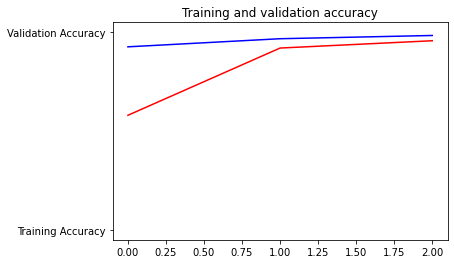

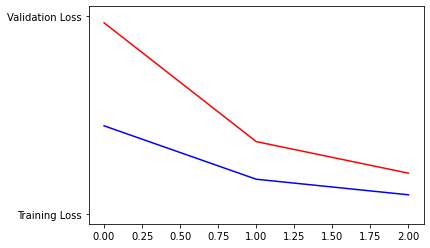

In [20]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs
#------------------------------------------------
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

In [21]:
model.save('model_best7Juni.h5')

In [22]:
from keras import models, layers, callbacks
model= models.load_model('model_best7Juni.h5')

In [23]:
test_generator.n

0

In [24]:
model.evaluate(validation_generator)

3/3 [==============================] - 1s 487ms/step - loss: 0.0968 - accuracy: 0.9836


[0.09678103029727936, 0.9836065769195557]

In [27]:
# import cv2
# pred= model.predict_generator(test_generator, steps= test_generator.n, verbose=1)

In [28]:
# predicted_class_indices=np.argmax(pred,axis=1)

# prediction_labels = [label_map[k] for k in predicted_class_indices]
# filenames= test_generator.filenames

In [29]:
# import csv
# csvfile= open('ray_reed_submission.csv', 'w', newline='')
# writer= csv.writer(csvfile)

# headers= ['file', 'species']

# writer.writerow(headers)
# t = PrettyTable(headers)
# for i, f, p in zip(range(len(filenames)), filenames, prediction_labels):
#     writer.writerow([os.path.basename(f),p])
#     if i <10:
#         t.add_row([os.path.basename(f), p])
#     elif i<13:
#         t.add_row(['.', '.'])
# csvfile.close()
# print(t)

In [25]:
def img_prep_predict(path):
    img = plt.imread(path)
    img=tf.image.resize(img,(224,224))
    img=tf.expand_dims(img,axis=0)
    img = img/255.
    predmod = np.ravel(model.predict(img))
    a= 0
    nji = 0
    for CATEGORIE in CATEGORIES:
        if predmod[a] > nji:
            mosnt = CATEGORIE
            nji = predmod[a]
        a+=1

    return mosnt

In [28]:
img_prep_predict(R"C:\Users\Donny Harahap\Downloads\240px-Clostridium_perfringens.jpg")

'CLOSTRIDIUM'

In [29]:
def img_prep_predict(path):
    img = plt.imread(path)
    img=tf.image.resize(img,(224,224))
    img=tf.expand_dims(img,axis=0)
    img = img/255.
    return img

In [37]:
if os.name == 'posix':
    !make qt5py3
if os.name =='nt':
    !cd {LABELIMG_PATH} && pyrcc5 -o libs/resources.py resources.qrc

Traceback (most recent call last):
  File "c:\Users\Donny Harahap\anaconda3\envs\tf\lib\runpy.py", line 192, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Donny Harahap\anaconda3\envs\tf\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "c:\Users\Donny Harahap\anaconda3\envs\tf\lib\site-packages\PyQt5\pyrcc_main.py", line 21, in <module>
    from PyQt5.QtCore import PYQT_VERSION_STR, QDir, QFile
ImportError: DLL load failed while importing QtCore: The specified procedure could not be found.


In [38]:
import cv2
thres = 0.45 # Threshold to detect object
 
cap = cv2.VideoCapture(1)
cap.set(3,1280)
cap.set(4,720)
cap.set(10,70)
 
classNames= []
classFile = ‘coco.names’
with open(classFile,’rt’) as f:
classNames = f.read().rstrip(‘n’).split(‘n’)
 
configPath = ‘ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt’
weightsPath = ‘frozen_inference_graph.pb’
 
net = cv2.dnn_DetectionModel(weightsPath,configPath)
net.setInputSize(320,320)
net.setInputScale(1.0/ 127.5)
net.setInputMean((127.5, 127.5, 127.5))
net.setInputSwapRB(True)
 
while True:
    success,img = cap.read()
    classIds, confs, bbox = net.detect(img,confThreshold=thres)
    print(classIds,bbox)
 
    if len(classIds) != 0:
        for classId, confidence,box in zip(classIds.flatten(),confs.flatten(),bbox):
            cv2.rectangle(img,box,color=(0,255,0),thickness=2)
            cv2.putText(img,classNames[classId-1].upper(),(box[0]+10,box[1]+30),
            cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)
            cv2.putText(img,str(round(confidence*100,2)),(box[0]+200,box[1]+30),
            cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)
 
    cv2.imshow(“Output”,img)
    cv2.waitKey(1)

SyntaxError: invalid character in identifier (3693571746.py, line 10)

In [ ]:
#TFLite Saved Model
export_dir = 'saved_model/1'

tf.saved_model.save(model, export_dir = export_dir)

In [ ]:
# Select mode of optimization
mode = "Speed" 

if mode == 'Storage':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_SIZE
elif mode == 'Speed':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_LATENCY
else:
    optimization = tf.lite.Optimize.DEFAULT

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)

# Set the optimzations
converter.optimizations = [optimization]

# Invoke the converter to finally generate the TFLite model
tflite_model = converter.convert()

In [ ]:
tflite_model_file = pathlib.Path('./model.tflite')
tflite_model_file.write_bytes(tflite_model)